In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from PIL import Image
from skimage.external.tifffile import imsave
import os
import fnmatch

# Functions
def radial_profile(data):
    
    y, x = np.indices((data.shape))
    
    center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
    
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

## Scatter the pattern contrast vs actin contrast and Calculate the correlation coefficient

The correlation coefficient of data_negative cell_3 = -0.306
The correlation coefficient of data_negative cell_4 = 0.014
The correlation coefficient of data_negative cell_5 = 0.274
The correlation coefficient of data_negative cell_6 = -0.130
The correlation coefficient of data_negative cell_7 = -0.063
The correlation coefficient of data_negative cell_10 = 0.372
The correlation coefficient of data_negative cell_13 = 0.505
The correlation coefficient of data_negative cell_14 = 0.358
The correlation coefficient of negative_20180306 cell_2 = 0.247
cell_3 actin contrast cant be computed
cell_3 actin contrast cant be computed
The correlation coefficient of negative_20180306 cell_3 = -0.195
The correlation coefficient of negative_20180306 cell_5 = -0.240
The correlation coefficient of negative_20180306 cell_8 = -0.083
The correlation coefficient of negative_20180306 cell_9 = 0.030
The correlation coefficient of negative_20180306 cell_10 = -0.323
The correlation coefficient of negative_2018030

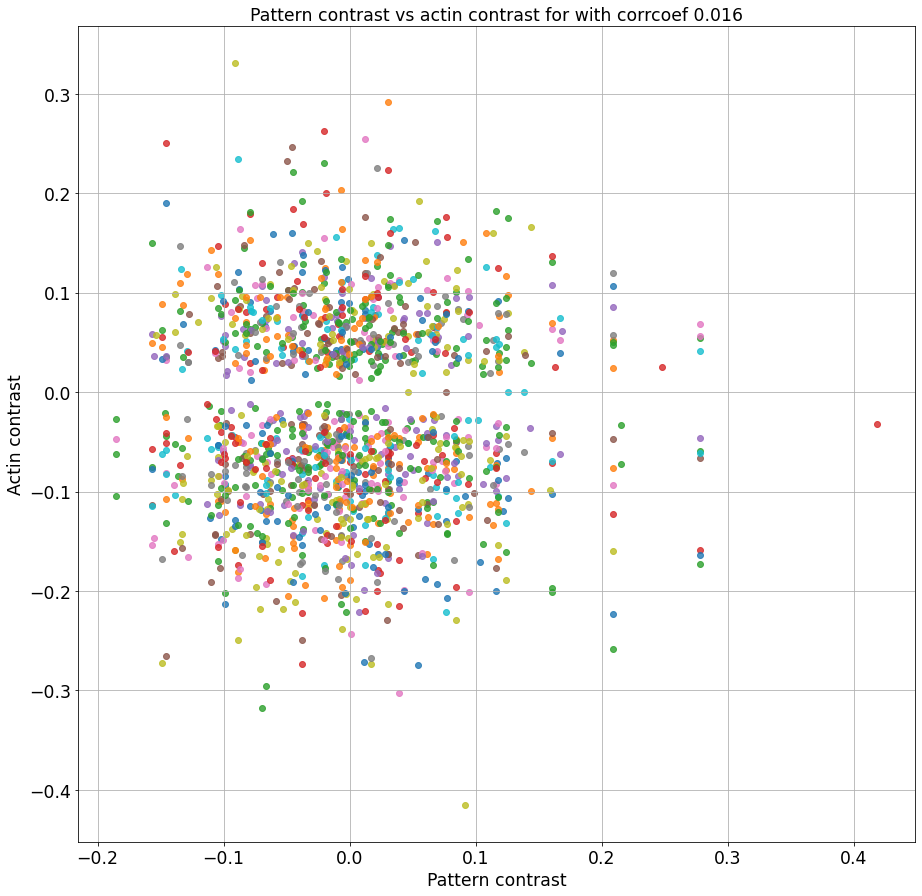

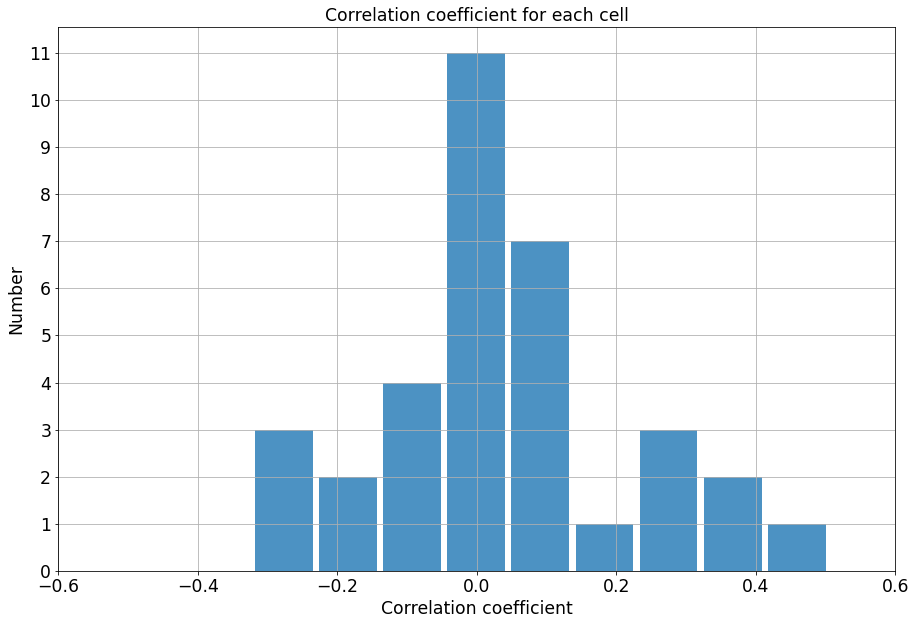

In [2]:
Corr = []
contrast_pattern_pull, contrast_actin_pull = [], []

# Make the figure
plt.figure(figsize=(15,15))

# Determine the date and the cells
date = "data_negative"
Cells = ['cell_4', 'cell_3', 'cell_10', 'cell_6', 'cell_5', 'cell_14', 'cell_7', 'cell_13']

# Sort the cell names
Cells.sort(key= lambda x: float(x.strip('cell_')))

for cell in Cells:
    # Read the stack
    Stack_pattern = io.imread('data/actin_comparison/{}_{}_pattern_dots.tif'.format(date, cell))
    Stack_actin = io.imread('data/actin_comparison/{}_{}_actin_dots.tif'.format(date, cell))

    # Compute contrast_pattern and contrast_actin for each cell
    contrast_pattern, contrast_actin = [], []
    for img_pattern, img_actin in zip(Stack_pattern, Stack_actin):

        # Take the radial profile for actin and pattern for the cell
        profile_actin, profile_pattern = radial_profile(img_actin), radial_profile(img_pattern)

        # Append the pattern contrast for the cell
        contrast_pattern.append((profile_pattern[0] - profile_pattern[10]) / (profile_pattern[0] + profile_pattern[10]))

        # Compute the actin contrast for the cell
        c_actin = (profile_actin[:10].max() - profile_actin[:10].min()) / (profile_actin[:10].max() + profile_actin[:10].min())

        # Add the sign for to the actin contrast of the cell
        try:
            if np.where(profile_actin == profile_actin[:10].max()) > np.where(profile_actin == profile_actin[:10].min()):
                contrast_actin.append(-c_actin)
            else:
                contrast_actin.append(c_actin)
        except:
            print('{} actin contrast cant be computed'.format(cell))
            contrast_actin.append(0)
            
    # Pull
    contrast_pattern_pull.append(contrast_pattern)
    contrast_actin_pull.append(contrast_actin)
                    
    # Transform contrast_pattern and contrast_actin into numpy arrays
    contrast_pattern = np.array(contrast_pattern)
    contrast_actin = np.array(contrast_actin)
    
    # Calculate the correlation coefficient 
    print('The correlation coefficient of {} {} = {:.3f}'.format(date, cell, np.corrcoef(contrast_pattern, contrast_actin)[0,1]))
    Corr.append(np.corrcoef(contrast_pattern, contrast_actin)[0,1])
    
    # Scatter
    plt.scatter(contrast_pattern, contrast_actin, label = '208_{}'.format(cell), alpha = 0.8)
    

# Determine the date and the cells
date = "negative_20180306"
Cells = ['cell_3', 'cell_10', 'cell_5', 'cell_14', 'cell_16', 'cell_12', 'cell_15', 'cell_9', 'cell_8', 'cell_13', 'cell_2']


# Sort the cell names
Cells.sort(key= lambda x: float(x.strip('cell_')))

for cell in Cells:
    # Read the stack
    Stack_pattern = io.imread('data/actin_comparison/{}_{}_pattern_dots.tif'.format(date, cell))
    Stack_actin = io.imread('data/actin_comparison/{}_{}_actin_dots.tif'.format(date, cell))

    # Compute contrast_pattern and contrast_actin for each cell
    contrast_pattern, contrast_actin = [], []
    for img_pattern, img_actin in zip(Stack_pattern, Stack_actin):

        # Take the radial profile for actin and pattern for the cell
        profile_actin, profile_pattern = radial_profile(img_actin), radial_profile(img_pattern)

        # Append the pattern contrast for the cell
        contrast_pattern.append((profile_pattern[0] - profile_pattern[10]) / (profile_pattern[0] + profile_pattern[10]))

        # Compute the actin contrast for the cell
        c_actin = (profile_actin[:10].max() - profile_actin[:10].min()) / (profile_actin[:10].max() + profile_actin[:10].min())

        # Add the sign for to the actin contrast of the cell
        try:
            if np.where(profile_actin == profile_actin[:10].max()) > np.where(profile_actin == profile_actin[:10].min()):
                contrast_actin.append(-c_actin)
            else:
                contrast_actin.append(c_actin)
        except:
            print('{} actin contrast cant be computed'.format(cell))
            contrast_actin.append(0)
            
    # Pull
    contrast_pattern_pull.append(contrast_pattern)
    contrast_actin_pull.append(contrast_actin)

    # Transform contrast_pattern and contrast_actin into numpy arrays
    contrast_pattern = np.array(contrast_pattern)
    contrast_actin = np.array(contrast_actin)

    # Calculate the correlation coefficient 
    print('The correlation coefficient of {} {} = {:.3f}'.format(date, cell, np.corrcoef(contrast_pattern, contrast_actin)[0,1]))
    Corr.append(np.corrcoef(contrast_pattern, contrast_actin)[0,1])
    
    # Scatter
    plt.scatter(contrast_pattern, contrast_actin, label = '326_{}'.format(cell), alpha = 0.8)
    

# Determine the date and the cells
date = "negative_20180420"
Cells = ['cell_4', 'cell_3', 'cell_10', 'cell_20', 'cell_6', 'cell_19', 'cell_5', 'cell_14', 'cell_16', 'cell_11', 'cell_15', 'cell_17', 'cell_7', 'cell_9', 'cell_13']

# Sort the cell names
Cells.sort(key= lambda x: float(x.strip('cell_')))

for cell in Cells:
    # Read the stack
    Stack_pattern = io.imread('data/actin_comparison/{}_{}_pattern_dots.tif'.format(date, cell))
    Stack_actin = io.imread('data/actin_comparison/{}_{}_actin_dots.tif'.format(date, cell))

    # Compute contrast_pattern and contrast_actin for each cell
    contrast_pattern, contrast_actin = [], []
    for img_pattern, img_actin in zip(Stack_pattern, Stack_actin):

        # Take the radial profile for actin and pattern for the cell
        profile_actin, profile_pattern = radial_profile(img_actin), radial_profile(img_pattern)

        # Append the pattern contrast for the cell
        contrast_pattern.append((profile_pattern[0] - profile_pattern[10]) / (profile_pattern[0] + profile_pattern[10]))

        # Compute the actin contrast for the cell
        c_actin = (profile_actin[:10].max() - profile_actin[:10].min()) / (profile_actin[:10].max() + profile_actin[:10].min())

        # Add the sign for to the actin contrast of the cell
        try:
            if np.where(profile_actin == profile_actin[:10].max()) > np.where(profile_actin == profile_actin[:10].min()):
                contrast_actin.append(-c_actin)
            else:
                contrast_actin.append(c_actin)
        except:
            print('{} actin contrast cant be computed'.format(cell))
            contrast_actin.append(0)
            
    # Pull
    contrast_pattern_pull.append(contrast_pattern)
    contrast_actin_pull.append(contrast_actin)

    # Transform contrast_pattern and contrast_actin into numpy arrays
    contrast_pattern = np.array(contrast_pattern)
    contrast_actin = np.array(contrast_actin)

    # Calculate the correlation coefficient 
    print('The correlation coefficient of {} {} = {:.3f}'.format(date, cell, np.corrcoef(contrast_pattern, contrast_actin)[0,1]))
    Corr.append(np.corrcoef(contrast_pattern, contrast_actin)[0,1])
    
    # Scatter
    plt.scatter(contrast_pattern, contrast_actin, label = '326_{}'.format(cell), alpha = 0.8)
    
    
# Transform the pull contrast into flat numpy arrays
contrast_pattern_pull = np.array([item for sublist in contrast_pattern_pull for item in sublist])
contrast_actin_pull = np.array([item for sublist in contrast_actin_pull for item in sublist])


# Interpolation
#m, b = np.polyfit(contrast_pattern, contrast_actin, 1)
#plt.plot(contrast_pattern, b + m * contrast_pattern,  'gray', label = 'Linear Fitting')

# Details
plt.xlabel('Pattern contrast', fontsize = 'xx-large')
plt.ylabel('Actin contrast', fontsize = 'xx-large')
plt.xticks(fontsize = 'xx-large')
plt.yticks(fontsize = 'xx-large')
plt.title('Pattern contrast vs actin contrast for with corrcoef {:.3f}'.format(np.corrcoef(contrast_pattern_pull, contrast_actin_pull)[0,1]), fontsize = 'xx-large')
#plt.legend(fontsize = 'large')
plt.grid()
# Save the scattering figure
plt.savefig('data/actin_comparison/pattern_contrast_vs_actin_contrast_negative')
# Show the scattering figure
plt.show()

plt.figure(figsize=(15,10))
plt.hist(Corr, bins = 9, rwidth = 0.9, alpha = 0.8)
plt.xlabel('Correlation coefficient', fontsize = 'xx-large')
plt.ylabel('Number', fontsize = 'xx-large')
plt.xticks(np.arange(-0.6, 0.7, 0.2), fontsize = 'xx-large')
plt.yticks(np.arange(0, 12, 1), fontsize = 'xx-large')
plt.title('Correlation coefficient for each cell', fontsize = 'xx-large')
plt.grid()
# Save
plt.savefig('data/actin_comparison/pattern_contrast_vs_actin_contrast_hist_negative')
# Show the scattering figure
plt.show()

In [3]:
# Read the data and drop the missing values

data_negative= pd.read_excel('data/Actin.xlsx', sheet_name='data_negative')

negative_20180306 = pd.read_excel('data/Actin.xlsx', sheet_name='negative_20180306')
#negative_20180306 = negative_20180306[negative_20180306.cell != 'cell_3']
#negative_20180306 = negative_20180306[negative_20180306.cell != 'cell_13']

negative_20180420 = pd.read_excel('data/Actin.xlsx', sheet_name='negative_20180420')
#negative_20180420 = negative_20180420[negative_20180420.cell != 'cell_14']

data_negative_acc = data_negative['ACC'].values

negative_20180306_acc = negative_20180306['ACC'].values

negative_20180420_acc = negative_20180420['ACC'].values

Manual_accuracy = np.hstack((data_negative_acc,negative_20180306_acc,negative_20180420_acc))

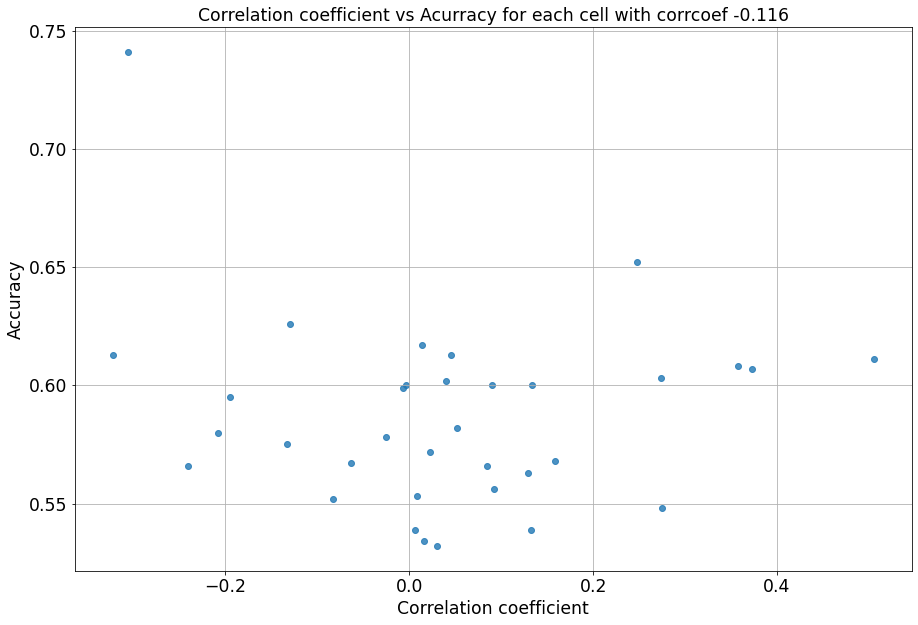

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(Corr, Manual_accuracy, alpha = 0.8)
plt.xlabel('Correlation coefficient', fontsize = 'xx-large')
plt.ylabel('Accuracy', fontsize = 'xx-large')
plt.xticks(fontsize = 'xx-large')
plt.yticks(fontsize = 'xx-large')
plt.title('Correlation coefficient vs Acurracy for each cell with corrcoef {:.3f}'.format(np.corrcoef(Corr, Manual_accuracy)[0,1]), fontsize = 'xx-large')
plt.grid()
# Save
plt.savefig('data/actin_comparison/Correlation_coefficient_vs_Acurracy_manual_negative')
# Show the scattering figure
plt.show()

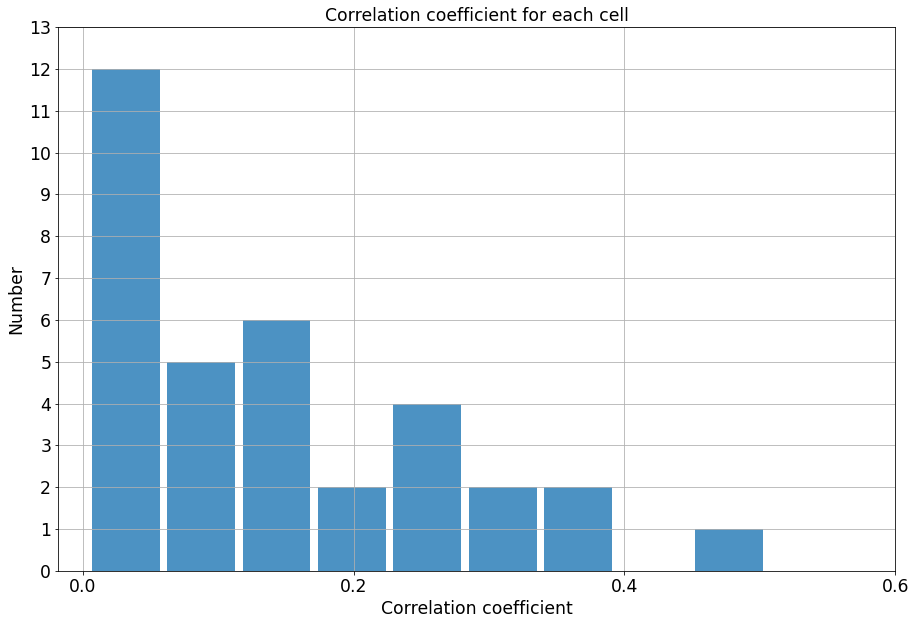

In [5]:
plt.figure(figsize=(15,10))
plt.hist(np.abs(Corr), bins = 9, rwidth = 0.9, alpha = 0.8)
plt.xlabel('Correlation coefficient', fontsize = 'xx-large')
plt.ylabel('Number', fontsize = 'xx-large')
plt.xticks(np.arange(0, 0.7, 0.2), fontsize = 'xx-large')
plt.yticks(np.arange(0, 14, 1), fontsize = 'xx-large')
plt.title('Correlation coefficient for each cell', fontsize = 'xx-large')
plt.grid()
# Save
plt.savefig('data/actin_comparison/pattern_contrast_vs_actin_contrast_hist_abs_negative')
# Show the scattering figure
plt.show()

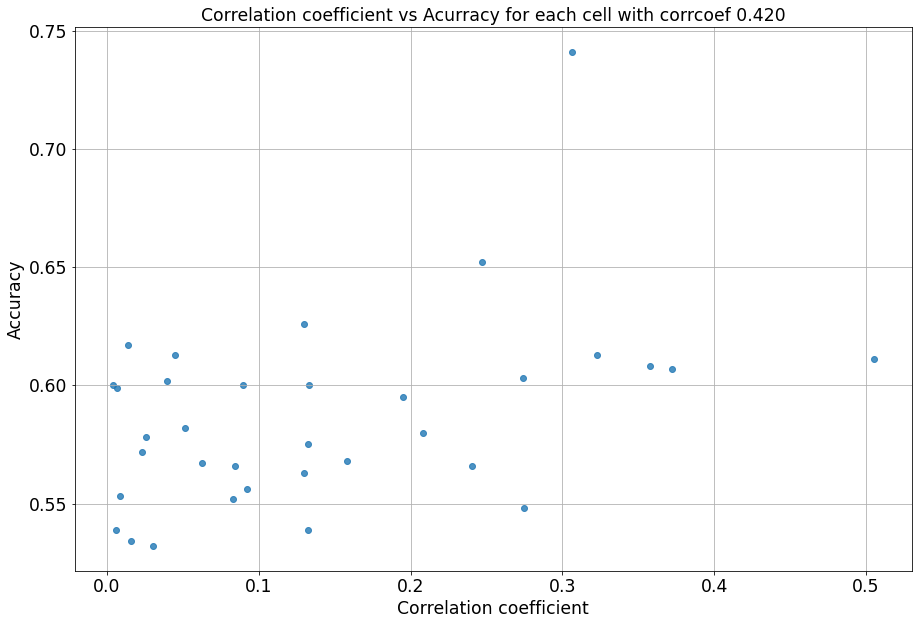

In [6]:
plt.figure(figsize=(15,10))
plt.scatter(np.abs(Corr), Manual_accuracy, alpha = 0.8)
plt.xlabel('Correlation coefficient', fontsize = 'xx-large')
plt.ylabel('Accuracy', fontsize = 'xx-large')
plt.xticks(fontsize = 'xx-large')
plt.yticks(fontsize = 'xx-large')
plt.title('Correlation coefficient vs Acurracy for each cell with corrcoef {:.3f}'.format(np.corrcoef(np.abs(Corr), Manual_accuracy)[0,1]), fontsize = 'xx-large')
plt.grid()
# Save
plt.savefig('data/actin_comparison/Correlation_coefficient_vs_Acurracy_manual_abs_negative')
# Show the scattering figure
plt.show()

In [7]:
date = "negative_20180420"

Cells = [cell for cell in [f.name for f in os.scandir("data/{}".format(date)) if f.is_dir()]
             if fnmatch.fnmatch(cell, 'cell_*')]

print(Cells)

['cell_4', 'cell_3', 'cell_10', 'cell_20', 'cell_6', 'cell_19', 'cell_5', 'cell_14', 'cell_16', 'cell_11', 'cell_15', 'cell_17', 'cell_7', 'cell_9', 'cell_13']
